In [1]:
import torch
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
resume_from = os.path.join('./checkpoint', 'inv-gp-0_run1_epoch049.pth')
checkpoint = torch.load(resume_from)
checkpoint['results'].keys()

dict_keys(['train_contrastive_loss', 'train_gradient_penalty', 'train_total_loss', 'test_loss', 'test_acc'])

In [2]:
def load_acc(file):
    resume_from = os.path.join('./checkpoint', file)
    checkpoint = torch.load(resume_from)
    return (checkpoint['results']['test_loss'])

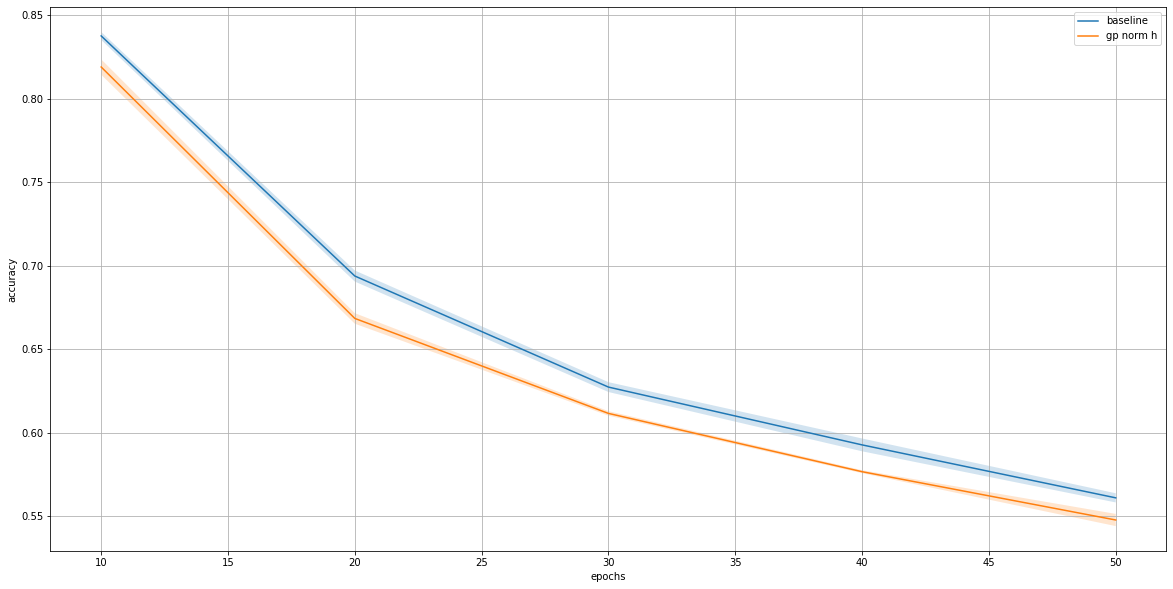

In [4]:
base_acc = []
for file in ['inv-gp-0_run1_epoch049.pth','inv-gp-0_run2_epoch049.pth','inv-gp-0_run3_epoch049.pth','inv-gp-0_run4_epoch049.pth', 'inv-gp-0_run5_epoch049.pth']:
    acc = load_acc(file)
    base_acc.append(acc)
base_acc = np.stack(base_acc)

gp_acc = []
for file in ['inv-gp-1_norm_run1_epoch049.pth','inv-gp-1_norm_run2_epoch049.pth','inv-gp-1_norm_run3_epoch049.pth', 'inv-gp-1_norm_run4_epoch049.pth', 'inv-gp-1_norm_run5_epoch049.pth']:
    acc = load_acc(file)
    gp_acc.append(acc)
gp_acc = np.stack(gp_acc)

gp_mean = gp_acc.mean(axis = 0)
base_mean = base_acc.mean(axis = 0)
gp_std = gp_acc.std(axis = 0)/np.sqrt(gp_acc.shape[0])
base_std = base_acc.std(axis = 0)/np.sqrt(base_acc.shape[0])

epoch = [i*10 for i in range(1,base_mean.shape[0]+1)]

###### plot #####
plt.figure(figsize=(20,10))
plt.plot(epoch, base_mean, label = 'baseline')
plt.fill_between(epoch, base_mean - 1*base_std, base_mean + 1*base_std, alpha = 0.2)

plt.plot(epoch, gp_mean, label = 'gp norm h')
plt.fill_between(epoch, gp_mean - 1*gp_std, gp_mean + 1*gp_std, alpha = 0.2)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

In [5]:
def load_closs(file):
    resume_from = os.path.join('./checkpoint', file)
    checkpoint = torch.load(resume_from)
    return (checkpoint['results']['train_contrastive_loss'])

In [6]:
basecloss = []
for file in ['inv-gp-0_run2_epoch049.pth','inv-gp-0_run3_epoch049.pth','inv-gp-0_run4_epoch049.pth', 'inv-gp-0_run5_epoch049.pth']:
    loss = load_closs(file)
    basecloss.append(loss)
basecloss = np.stack(basecloss)

In [7]:
gp_closs = []
for file in ['inv-gp-1_norm_run2_epoch049.pth','inv-gp-1_norm_run3_epoch049.pth', 'inv-gp-1_norm_run4_epoch049.pth']:
    loss = load_closs(file)
    gp_closs.append(loss)
gp_closs = np.stack(gp_closs)

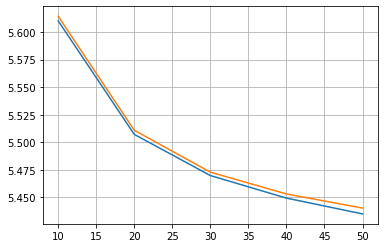

In [8]:
plt.plot(epoch, basecloss.mean(axis = 0))
plt.plot(epoch, gp_closs.mean(axis = 0))
plt.grid(True)

In [9]:
def load_gp(file):
    resume_from = os.path.join('./checkpoint', file)
    checkpoint = torch.load(resume_from)
    return (checkpoint['results']['train_gradient_penalty'])

In [10]:
base_gp = []
for file in ['inv-gp-0_run2_epoch049.pth','inv-gp-0_run3_epoch049.pth','inv-gp-0_run4_epoch049.pth', 'inv-gp-0_run5_epoch049.pth']:
    loss = load_gp(file)
    base_gp.append(loss)
base_gp = np.stack(base_gp)

In [11]:
gp_gp = []
for file in ['inv-gp-1_norm_run2_epoch049.pth','inv-gp-1_norm_run3_epoch049.pth', 'inv-gp-1_norm_run4_epoch049.pth']:
    loss = load_gp(file)
    gp_gp.append(loss)
gp_gp = np.stack(gp_gp)

# plot 100 epochs

In [12]:
load_acc('inv-gp-1_norm_run5_epoch019.pth')

[0.8357726514339447, 0.67412189245224]

In [13]:
load_acc('inv-gp-0_run2_epoch099.pth')

[0.8456564247608185,
 0.6863663494586945,
 0.6303479313850403,
 0.6034871816635132,
 0.5701368391513825,
 0.5379002392292023,
 0.5301922142505646,
 0.5131631374359131,
 0.5021164804697037,
 0.48826066255569456]

In [14]:
load_acc('inv-gp-0_run4_epoch099.pth')

[0.8329641997814179,
 0.6970318138599396,
 0.6319535195827484,
 0.6002112746238708,
 0.5613441407680512,
 0.5370023936033249,
 0.5287339419126511,
 0.5138069242238998,
 0.4983233273029327,
 0.48239392042160034]

In [15]:
load_acc('inv-gp-1_norm_run3_epoch099.pth')

[0.8151345729827881,
 0.6604808926582336,
 0.6109147250652314,
 0.5737120151519776,
 0.5517326563596725,
 0.5376414388418198,
 0.5057307720184326,
 0.49259465634822847,
 0.4847443014383316,
 0.4823253393173218]

In [16]:
load_acc('inv-gp-1_norm_run2_epoch099.pth')

[0.8229019165039062,
 0.6789060652256012,
 0.6103060781955719,
 0.5786695778369904,
 0.5543842732906341,
 0.5296689152717591,
 0.5138160735368729,
 0.49570189118385316,
 0.4817972809076309,
 0.4769736498594284]

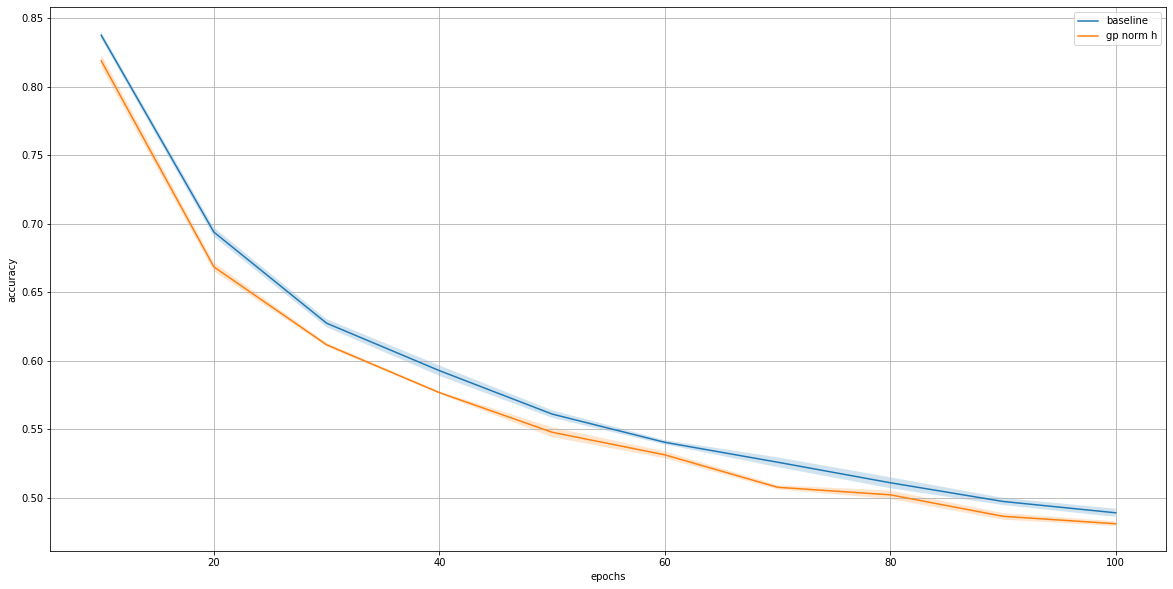

In [17]:
base_acc = []
for file in ['inv-gp-0_run1_epoch099.pth','inv-gp-0_run2_epoch099.pth','inv-gp-0_run3_epoch099.pth','inv-gp-0_run4_epoch099.pth','inv-gp-0_run5_epoch099.pth']:
    acc = load_acc(file)
    base_acc.append(acc)
base_acc = np.stack(base_acc)

gp_acc = []
for file in ['inv-gp-1_norm_run1_epoch099.pth','inv-gp-1_norm_run2_epoch099.pth', 'inv-gp-1_norm_run3_epoch099.pth', 'inv-gp-1_norm_run4_epoch099.pth','inv-gp-1_norm_run5_epoch099.pth']:
    acc = load_acc(file)
    gp_acc.append(acc)
gp_acc = np.stack(gp_acc)

gp_mean = gp_acc.mean(axis = 0)
base_mean = base_acc.mean(axis = 0)
gp_std = gp_acc.std(axis = 0)/np.sqrt(gp_acc.shape[0])
base_std = base_acc.std(axis = 0)/np.sqrt(base_acc.shape[0])

epoch = [i*10 for i in range(1,base_mean.shape[0]+1)]

###### plot #####
plt.figure(figsize=(20,10))
plt.plot(epoch, base_mean, label = 'baseline')
plt.fill_between(epoch, base_mean - 1*base_std, base_mean + 1*base_std, alpha = 0.2)

plt.plot(epoch, gp_mean, label = 'gp norm h')
plt.fill_between(epoch, gp_mean - 1*gp_std, gp_mean + 1*gp_std, alpha = 0.2)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

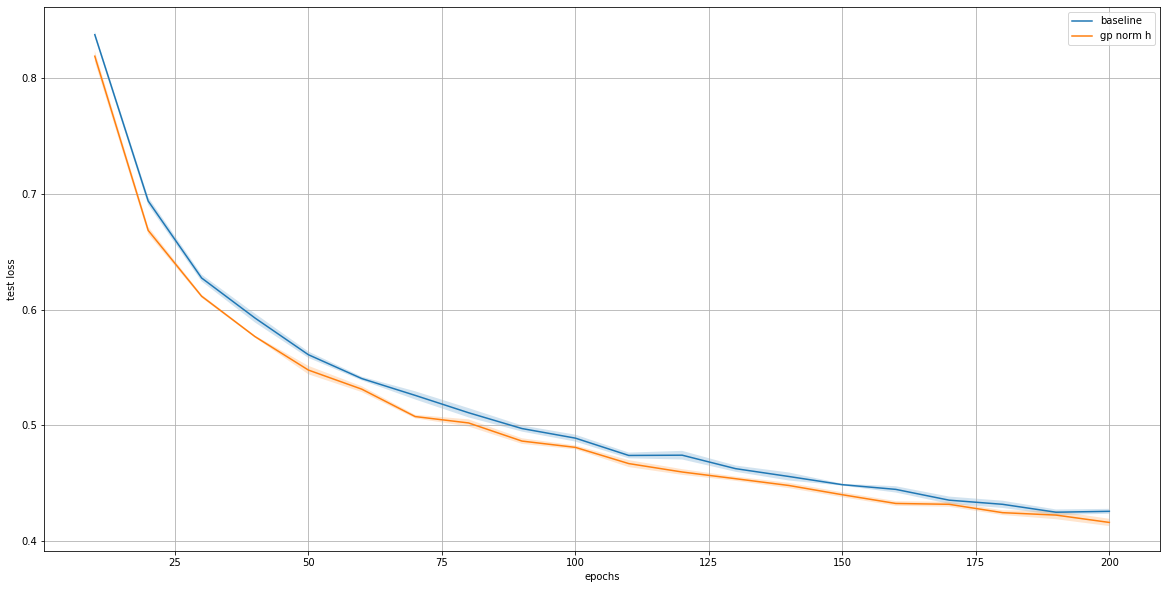

In [22]:
base_acc = []
for file in ['inv-gp-0_run1_epoch149.pth','inv-gp-0_run2_epoch149.pth','inv-gp-0_run3_epoch149.pth','inv-gp-0_run4_epoch149.pth','inv-gp-0_run5_epoch149.pth']:
    acc = load_acc(file)
    base_acc.append(acc)
base_acc = np.stack(base_acc)

gp_acc = []
for file in ['inv-gp-1_norm_run1_epoch149.pth','inv-gp-1_norm_run2_epoch149.pth', 'inv-gp-1_norm_run3_epoch149.pth','inv-gp-1_norm_run4_epoch149.pth','inv-gp-1_norm_run5_epoch149.pth']:
    acc = load_acc(file)
    gp_acc.append(acc)
gp_acc = np.stack(gp_acc)

gp_mean = gp_acc.mean(axis = 0)
base_mean = base_acc.mean(axis = 0)
gp_std = gp_acc.std(axis = 0)/np.sqrt(gp_acc.shape[0])
base_std = base_acc.std(axis = 0)/np.sqrt(base_acc.shape[0])

epoch = [i*10 for i in range(1,base_mean.shape[0]+1)]

###### plot #####
plt.figure(figsize=(20,10))
plt.plot(epoch, base_mean, label = 'baseline')
plt.fill_between(epoch, base_mean - 1*base_std, base_mean + 1*base_std, alpha = 0.2)

plt.plot(epoch, gp_mean, label = 'gp norm h')
plt.fill_between(epoch, gp_mean - 1*gp_std, gp_mean + 1*gp_std, alpha = 0.2)

plt.xlabel('epochs')
plt.ylabel('test loss')
plt.legend()
plt.grid(True)

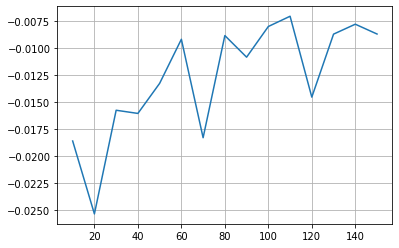

In [19]:
plt.plot(epoch, gp_mean - base_mean, label = 'mean gp - mean baseline')
plt.grid(True)

In [27]:
base_acc = []
for file in ['inv-gp-0_run1_epoch199.pth','inv-gp-0_run2_epoch199.pth','inv-gp-0_run3_epoch199.pth','inv-gp-0_run4_epoch199.pth','inv-gp-0_run5_epoch199.pth']:
    acc = load_acc(file)
    base_acc.append(acc)
base_acc = np.stack(base_acc)

gp_acc = []
for file in ['inv-gp-1_norm_run1_epoch199.pth','inv-gp-1_norm_run2_epoch199.pth','inv-gp-1_norm_run3_epoch199.pth', 'inv-gp-1_norm_run4_epoch199.pth','inv-gp-1_norm_run5_epoch199.pth']:
    acc = load_acc(file)
    gp_acc.append(acc)
gp_acc = np.stack(gp_acc)

gp_mean = gp_acc.mean(axis = 0)
base_mean = base_acc.mean(axis = 0)
gp_std = gp_acc.std(axis = 0)/np.sqrt(gp_acc.shape[0])
base_std = base_acc.std(axis = 0)/np.sqrt(base_acc.shape[0])

epoch = [i*10 for i in range(1,base_mean.shape[0]+1)]



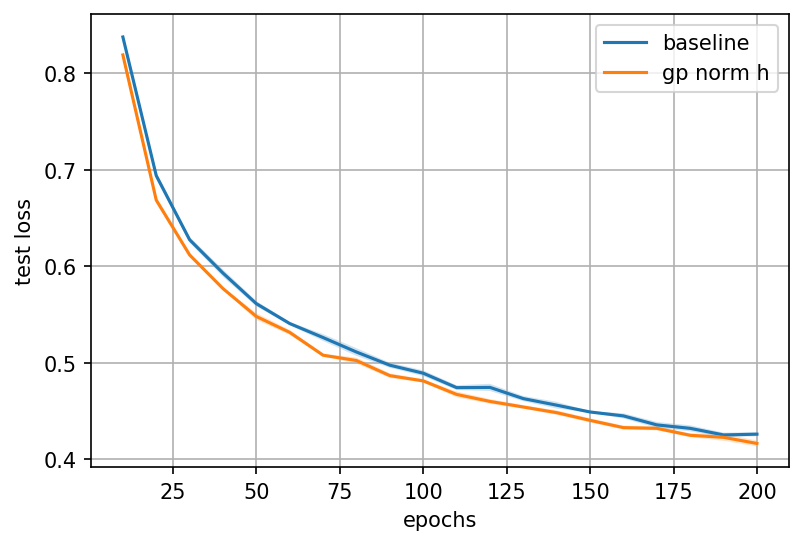

In [28]:
###### plot #####
plt.figure(dpi = 150)
plt.plot(epoch, base_mean, label = 'baseline')
plt.fill_between(epoch, base_mean - 1*base_std, base_mean + 1*base_std, alpha = 0.2)

plt.plot(epoch, gp_mean, label = 'gp norm h')
plt.fill_between(epoch, gp_mean - 1*gp_std, gp_mean + 1*gp_std, alpha = 0.2)

plt.xlabel('epochs')
plt.ylabel('test loss')
plt.legend()
plt.grid(True)